# Cropping arenas using OpenCV

in this notebook we demonstrate how arenas can be cropped out of an image using OpenCV tools.

# Packages import

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


# Loading the image and displaying it

The first step is to load the images to be processed. A good practice when working with images where color doesn't matter is to convert the image in grayscale if they're not already.

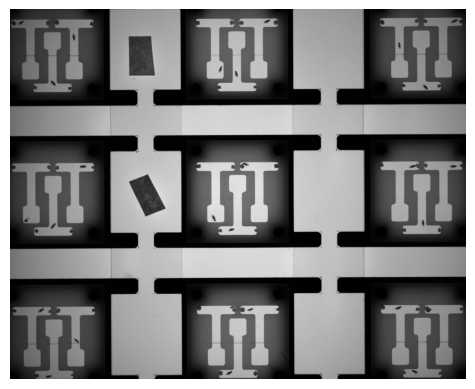

In [3]:
# Load the image
img = cv2.imread("prova_crop.jpg")

# Convert to grayscale if not already
if len(img.shape) > 2:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the image
fig, ax = plt.subplots()
plt.axis("off")
im = ax.imshow(img, cmap="gray", vmin=0, vmax = 255)

plt.show()

# Cropping the arenas

The arena cropping itself doesn't require precision and arenas are always distributed the same way in the images; therefore a quick and easy way to crop them is to find the coordinates of interest in the image and use them to crop the arenas.

> Note that the y axis is inverted in the image, which is standard with this kind of object

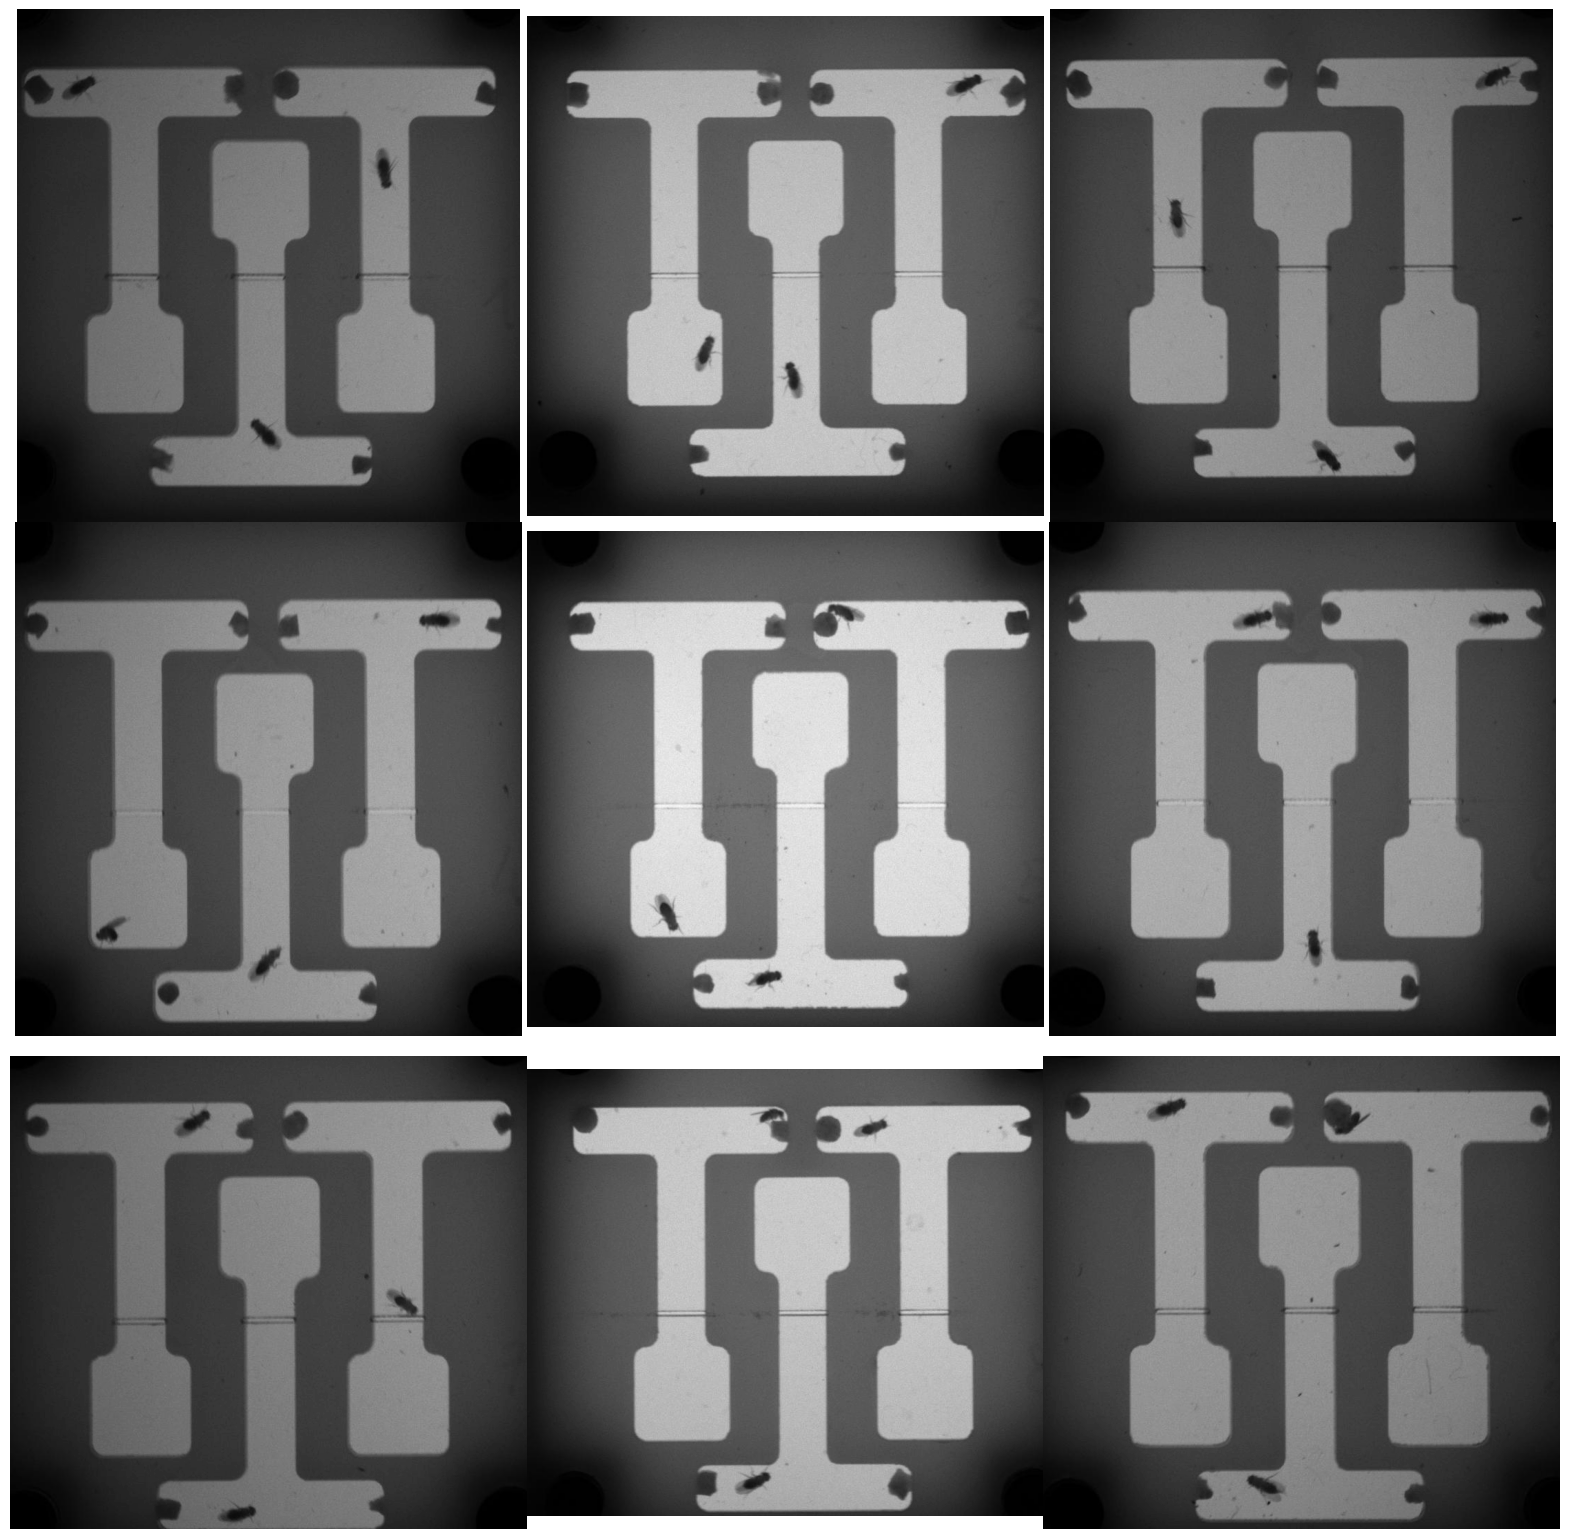

In [5]:
# Enter the arenas coordinates

X1 = 0
X2 = 710
X3 = 1450
X4 = 2200
X5 = 2980
X6 = 3690

Y1 = 0
Y2 = 725
Y3 = 1140
Y4 = 1860
Y5 = 2350
Y6 = 3200

# Make tuples containing the 9 combinations of coordinates required to get the arenas

regions_of_interest = [
    (X1, Y1, X2, Y2),
    (X3, Y1, X4, Y2),
    (X5, Y1, X6, Y2),
    (X1, Y3, X2, Y4),
    (X3, Y3, X4, Y4),
    (X5, Y3, X6, Y4),
    (X1, Y5, X2, Y6),
    (X3, Y5, X4, Y6),
    (X5, Y5, X6, Y6),
]

# Create a 3x3 grid of subplots to display each crop

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
for i in range(9):
    axs[i // 3, i % 3].axis("off")
    axs[i // 3, i % 3].imshow(
        img[
            regions_of_interest[i][1] : regions_of_interest[i][3],
            regions_of_interest[i][0] : regions_of_interest[i][2],
        ],
        cmap="gray",
        vmin=0,
        vmax=255,
    )

# Remove the axis of each subplot and draw them closer together
for ax in axs.flat:
    ax.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)

In [ ]:
# Select the first arena
#create a loop to do it with each arena

#prima riga sono le x, la seconda sono le y. lo zero della prima quadra indica la prima riga di coordinate che vedi nel blocco di codice sopra
#la seconda quadra invece indica tra quelle coordinate quale vogliamo prendere, per esempio prima riga avremo x1 e x2 mentre nella seconda y1 e y2

# Dictionary to store the images
arena_images = {}

i = 0
for i in range(9): 
    arena_name = f"Arena{i + 1}"
    arena= img[
        regions_of_interest[i][1] : regions_of_interest[i][3],
        regions_of_interest[i][0] : regions_of_interest[i][2],
    ]

# Store the image in the dictionary
    arena_images[arena_name] = arena

    # Display the image
    fig, ax = plt.subplots()
    plt.axis("off")
    im = ax.imshow(arena, cmap="gray", vmin=0, vmax = 255)
    plt.title(arena_name)

    plt.show()


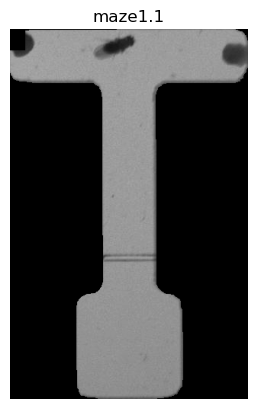

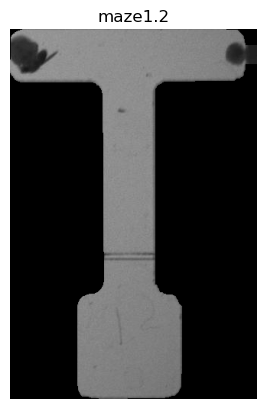

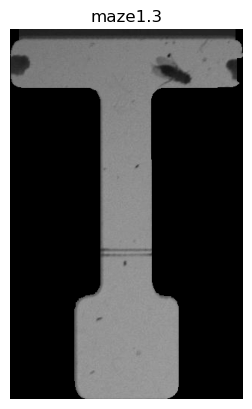

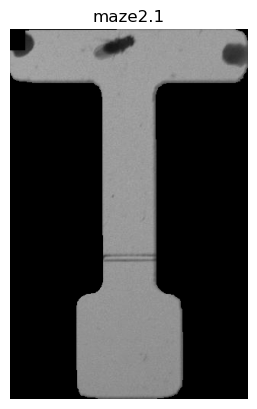

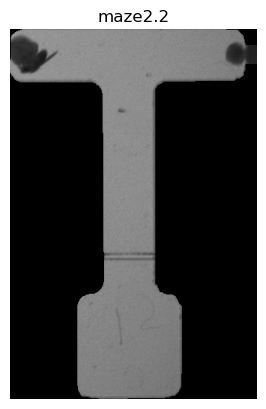

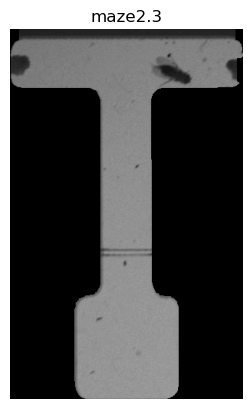

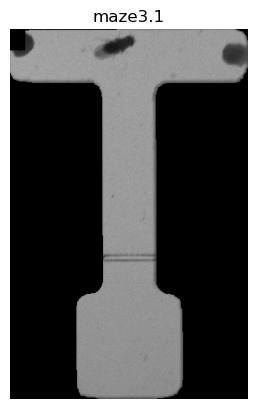

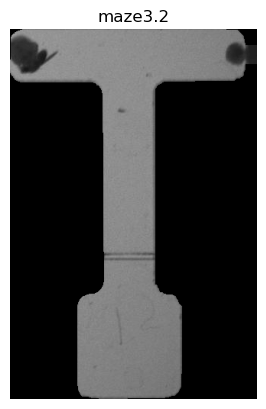

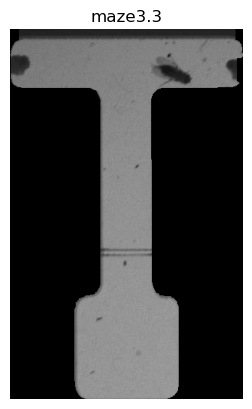

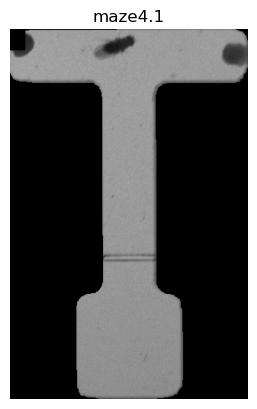

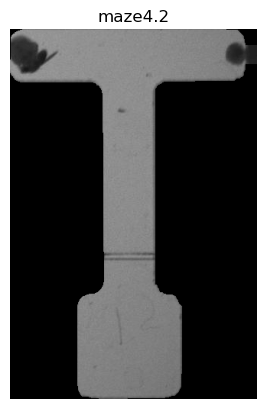

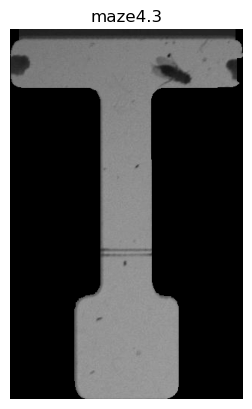

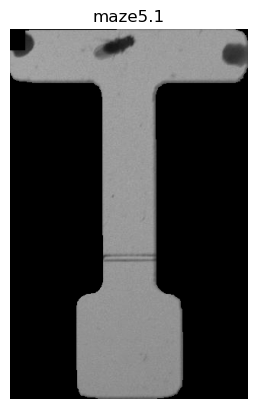

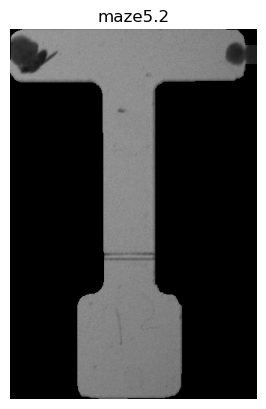

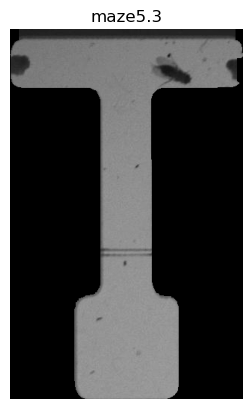

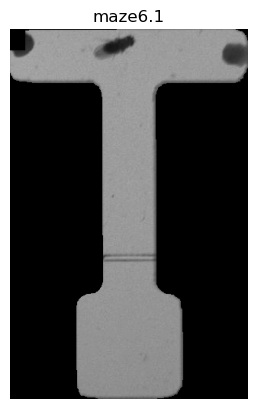

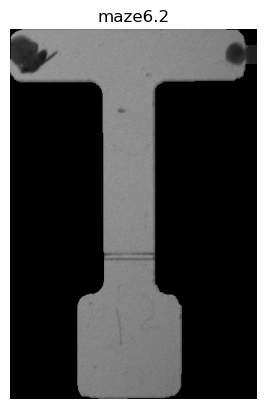

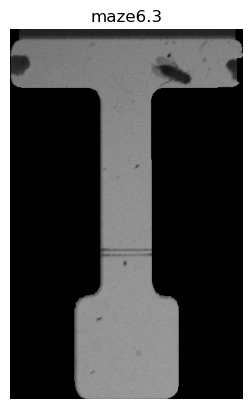

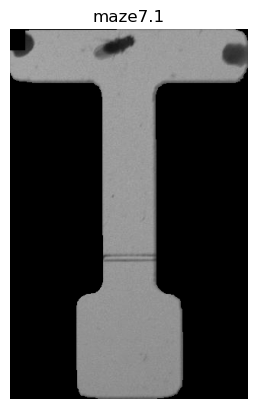

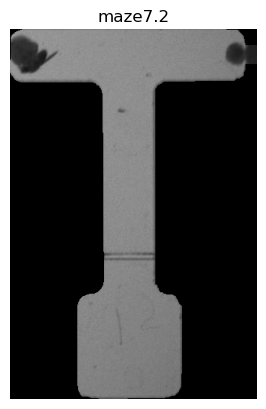

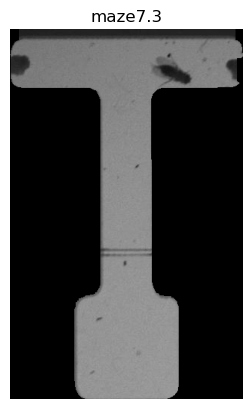

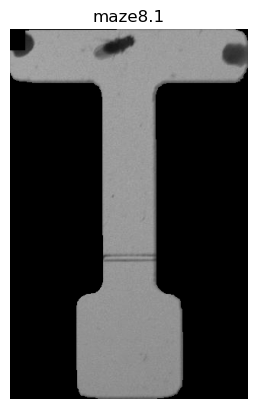

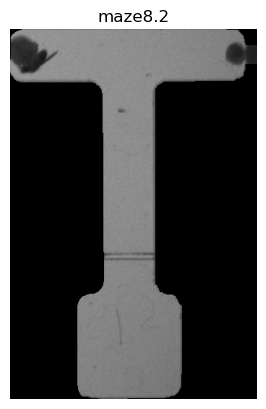

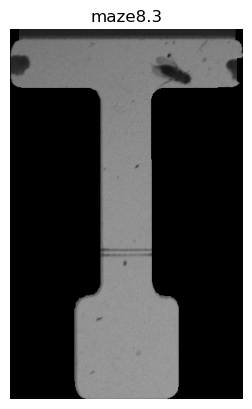

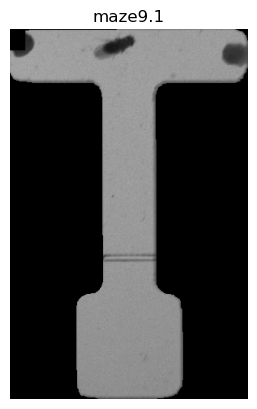

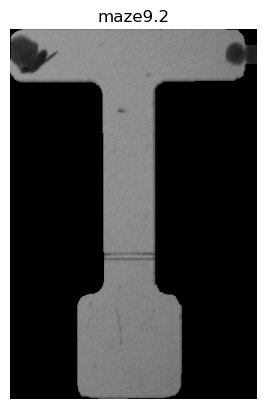

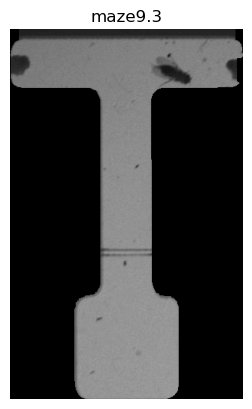

In [7]:
#LOOP TO DO IT WITH EACH single maze 

# Dictionary to store the images
maze_images = {}

i = 0
n=0
for i in range(9): 
    arena_name = f"Arena{i + 1}"
    arena_images[arena_name] = arena
    
    #threshold definition to understand what to crop 
    _, binary = cv2.threshold(arena,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#CLEAN BLACK DOTS HERE https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html 
#or you can select based on the area 

#closing to remove black dots inside our kernel
# Define the kernel for erosion
    kernel = np.ones((30, 30), np.uint8)  # Adjust kernel size as needed

# Apply erosion
    closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

    """ # Display the image after the closing
    fig, ax = plt.subplots()
    plt.axis("off")
    im = ax.imshow(closing, cmap="gray", vmin=0, vmax = 255)
    plt.show()
    """

    # Apply connected components to label connected regions (so to extract the shape we are interested in) and get statistics
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(closing)

    # Iterate through each labeled component (excluding background label)
    for label in range(1, num_labels):
        # Get statistics for the component
        left, top, width, height, area = stats[label]
        centroid_x, centroid_y = centroids[label]

        # Create a mask for this specific component
        component_mask = np.uint8(labels == label) * 255 
        
        # Use bitwise AND operation to extract the shape
        shape = cv2.bitwise_and(arena, arena, mask=component_mask)

        shape_crop= shape[top:top+height, left:left+width]
        maze_name = f"maze{i+1}.{label}"
        maze_images[maze_name] = shape_crop
        # Rotate the image
        if label == 3:
            shape_crop = cv2.rotate(shape_crop, cv2.ROTATE_180)

    #     # Save or process the extracted shape
    #     cv2.imwrite(f'shape_{label}.jpg', shape)  
    #     # Print statistics
    #     print(f"Component {label}:")
    #     print(f"  Area: {area}")
    #     print(f"  Bounding Box: ({left}, {top}, {width}, {height})")
    #     print(f"  Centroid: ({centroid_x}, {centroid_y})")
    # # Show the result
    # cv2.imshow('Result', image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows() 

        # Display the image
        fig, ax = plt.subplots()
        plt.axis("off")
        im = ax.imshow(shape_crop, cmap="gray", vmin=0, vmax = 255)
        plt.title(maze_name)

        plt.show()

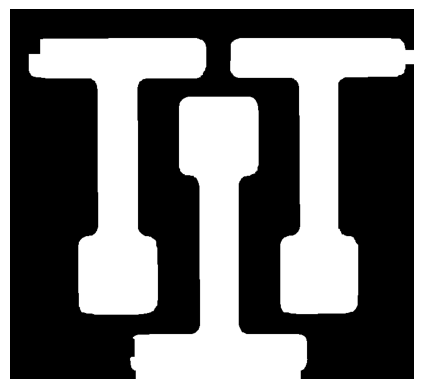

In [8]:
# Display the image of the closing
fig, ax = plt.subplots()
plt.axis("off")
im = ax.imshow(closing, cmap="gray", vmin=0, vmax = 255)
plt.show()